To implement any kind of neural network in PyTorch, we must phrase the problem as an optimization problem.

In [41]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.utils.data
from tqdm.autonotebook import tqdm 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [42]:
# Helper move to function

def moveTo(obj, device): 
    """ 
    obj: the python object to move to a device, or to move its
    ➥ contents to a device
    device: the compute device to move objects to 
    """
    if isinstance(obj, list): 
        return [moveTo(x, device) for x in obj] 
    elif isinstance(obj, tuple): 
        return tuple(moveTo(list(obj), device)) 
    elif isinstance(obj, set): 
        return set(moveTo(list(obj), device)) 
    elif isinstance(obj, dict): 
        to_ret = dict() 
        for key, value in obj.items(): 
            to_ret[moveTo(key, device)] = moveTo(value, device) 
        return to_ret 
    elif hasattr(obj, "to"): 
        return obj.to(device) 
    else: 
        return obj

In [43]:
# The code for the simple training loop 

def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # Creates the optimizer and moses the model to the device

    model.to(device) # Places the model on the correct compute resource

    for epoch in tqdm(range(epochs), desc="Epochs"): # For each epoch
        model = model.train() # Sets the model to training mode
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False): # For each batch
            # Move the inputs and labels to the correct device
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)     

            # Zero the gradients - cleans up the gradients from the previous batch
            optimizer.zero_grad()

            y_hat = model(inputs) # Forward pass, computes f(xi) of Theta

            loss = loss_func(y_hat, labels) # Computes the loss
            loss.backward() # Computes the gradients
            optimizer.step() # Updates the parameters
            running_loss += loss.item()

This code above is sufficient to train almost all of the neural networks. All we need to give it now is some data, a network and a loss function to work with.

<AxesSubplot:>

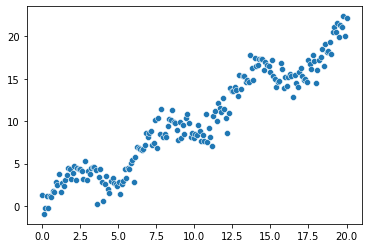

In [44]:
# Let's create some synthetic regression problem 
X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size = X.shape) 

# Let's plot the data
sns.scatterplot(x=X, y=y)

In [45]:
# Dataset object to load our data into a DataLoader

class Simple1DRegressionDataset(Dataset): 
    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__() 
        self.X = X.reshape(-1,1) 
        self.y = y.reshape(-1,1) 
    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self): 
        return self.X.shape[0] 
training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [46]:
# Define the model

in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()

device = torch.device("mps")
train_simple_network(model, loss_func, training_loader, device=device)

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<AxesSubplot:>

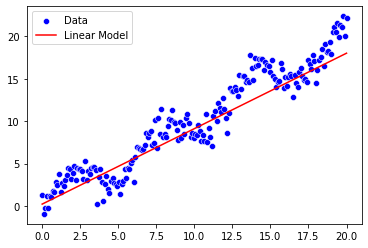

In [47]:
# When making prediciton, make sure we use the no_grad() context manager

with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), dtype=torch.float32).to(device)).cpu().numpy()

sns.scatterplot(x=X, y=y, color="blue", label="Data")
sns.lineplot(x=X, y=Y_pred.ravel(), color="red", label="Linear Model")

Let's build this: 

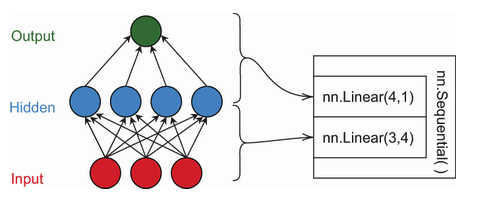

In [48]:
model = nn.Sequential(
    nn.Linear(in_features, 10),
    nn.Linear(10, out_features),
)

train_simple_network(model, loss_func, training_loader)

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<AxesSubplot:>

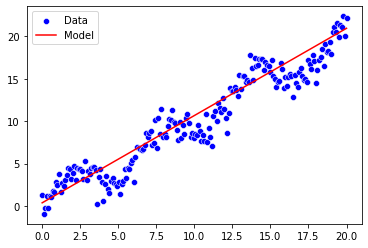

In [49]:
with torch.no_grad(): 
    Y_pred = model(torch.tensor(X.reshape(-1,1),                        
        dtype=torch.float32)).cpu().numpy() 

sns.scatterplot(x=X, y=y, color='blue', label='Data')               
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Model') 

In [ ]:
# Let's see what happens when adding a Tanh node to our sequential network - non linearity

model = nn.Sequential(
    nn.Linear(in_features, 10),
    nn.Tanh(),
    nn.Linear(10, out_features),
)

train_simple_network(model, loss_func, training_loader, epochs=200)

with torch.no_grad(): 
    Y_pred = model(torch.tensor(X.reshape(-1,1),                        
        dtype=torch.float32)).cpu().numpy()

<AxesSubplot:>

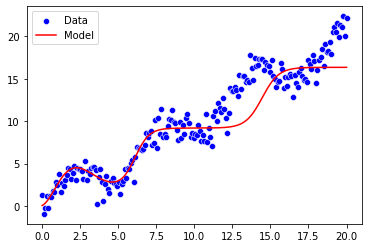

In [51]:
sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Model')

-----

Classification problem 

<AxesSubplot:>

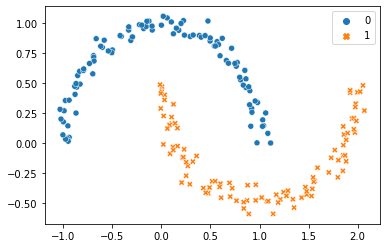

In [52]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)

In [58]:
# Wrap the data in a TensorDataset object

classification_dataset = torch.utils.data.TensorDataset(
    torch.tensor(X, dtype=torch.float32),
    torch.tensor(y, dtype=torch.long)
)

# Create the DataLoader
training_loader = DataLoader(classification_dataset)

In [59]:
in_features = 2
out_features = 2
model = nn.Linear(in_features, out_features)

In [ ]:
loss_func = nn.CrossEntropyLoss()
train_simple_network(model, loss_func, training_loader, epochs=50)

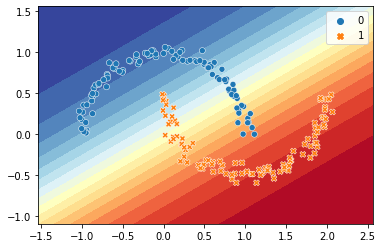

In [62]:
def visualize2DSoftmax(X, y, model, title=None): 
    x_min = np.min(X[:,0])-0.5 
    x_max = np.max(X[:,0])+0.5 
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5 
    xv, yv = np.meshgrid(np.linspace(x_min, x_max, num=20), np.linspace(y_min, y_max, num=20), indexing='ij') 
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1))) 
    with torch.no_grad():
        logits = model(torch.tensor(xy_v, dtype=torch.float32)) 
        y_hat = F.softmax(logits, dim=1).numpy()

    cs = plt.contourf(xv, yv, y_hat[:,0].reshape(20,20), levels=np.linspace(0,1,num=20), cmap=plt.cm.RdYlBu) 
    ax = plt.gca() 
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax) 
    if title is not None: 
        ax.set_title(title)

visualize2DSoftmax(X, y, model)

In [ ]:
# It did what we expected, but let's try to add a non-linearity

model = nn.Sequential(
    nn.Linear(in_features, 30),
    nn.Tanh(),
    nn.Linear(30, 30),
    nn.Tanh(),
    nn.Linear(30, out_features),
)

train_simple_network(model, loss_func, training_loader, epochs=250)

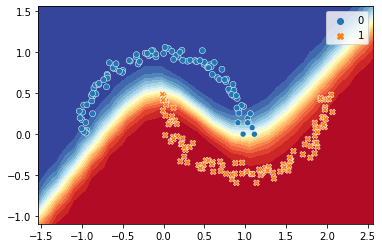

In [66]:
visualize2DSoftmax(X, y, model)